In [1]:
import os
from random import sample
import pandas as pd
from eyened_orm import ImageInstance, SourceInfo, DBManager
from eyened_orm.utils import get_config

# from rtnls_fundusprep.preprocessor import FundusPreprocessor
# from rtnls_fundusprep.utils import preprocess_for_inference
from sqlalchemy import select, func
from tqdm.notebook import tqdm
import pydicom
from pathlib import Path

In [2]:
from random import sample
from PIL import Image
import numpy as np
import cv2
from eyened_orm.importer.thumbnails import get_thumbnail, save_thumbnails

In [3]:
config = get_config("prod")
DBManager.init(config)
session = DBManager.get_session()

In [4]:

stmt = select(ImageInstance).where(ImageInstance.DatasetIdentifier.like(f"%.binary"))
images = session.execute(stmt).scalars().all()

In [4]:
images = session.execute(select(ImageInstance).order_by(func.random()).limit(2000)).scalars().all()

In [5]:
images_binary = [im for im in images if im.path.endswith(".binary")]
images_dicom = [im for im in images if im.path.endswith(".dcm")]
images_png = [im for im in images if im.path.endswith(".png")]

In [6]:
def plot(ims_sample):
    import numpy as np

    import matplotlib.pyplot as plt
    
    fig, axs = plt.subplots(2, 4, figsize=(15, 8))
    axs = axs.flatten()

    for i, (im) in enumerate(ims_sample):
        print(im.ImageInstanceID, im.path)
        # try:
        # Use the read_thumbnail function defined earlier to get the image
        if im.path.endswith(".json"):
            continue
        img = get_thumbnail(im)
        # print(img)
        if img is not None:
            if img.ndim == 3:
                axs[i].imshow(img)
            else:
                axs[i].imshow(img, cmap="gray")
        # except Exception as e:
            # print(f'Error: {str(e)}')
        
        axs[i].set_title(f"ID: {im.ImageInstanceID}")
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

1006543 /mnt/oogergo/ergo/HRA_ERGO/DATA/2df6a7fa-f7d9-49a7-bcc5-dc4203c2cda5/00008268-00068677-AF_B-0-8.png
477819 /mnt/oogergo/ergo/CF_ERGO/DATA/c56c411b-9db8-4991-aa62-81a722d1e95c/00004753-PAP-OD-20061107-001-001.png
1180298 /mnt/oogergo/ergo/HRA_ERGO/DATA/324b64ed-1be8-4c5d-8a76-562defaaf84b/00003785-00030234-AF_B-0-8.png
2471004 /mnt/oogergo/eyened/uitwissel/areds/imgs/extracted/AREDS_AREDS_2010_dng_Fundus_FundusReflex_Baseline_AMD_Category_4a_Final_AMD_Phenotype_Case_NV_AMD_Year12/3449_24_RE_FunRef_LS.png
645387 /mnt/oogergo/ergo/CF_ERGO/DATA_IBASE/83376c75-9491-4bc8-b626-13ad423e15cf/4568V16B456BGGOW.png
1113606 /mnt/oogergo/ergo/HRA_ERGO/DATA/c79e301a-1909-4e47-b6fc-66ea586f6c83/00007789-00064341-AF_B-0-10.png
219390 /mnt/oogergo/ergo/OCT_ERGO/OCT_prd/6b09b138-fefe-4336-a72c-040237b2fb2e/10668.png
1120390 /mnt/oogergo/ergo/HRA_ERGO/DATA/8e9d3c81-f170-4107-b251-86adf18abde5/00000309-00002030-RF-0-24.png


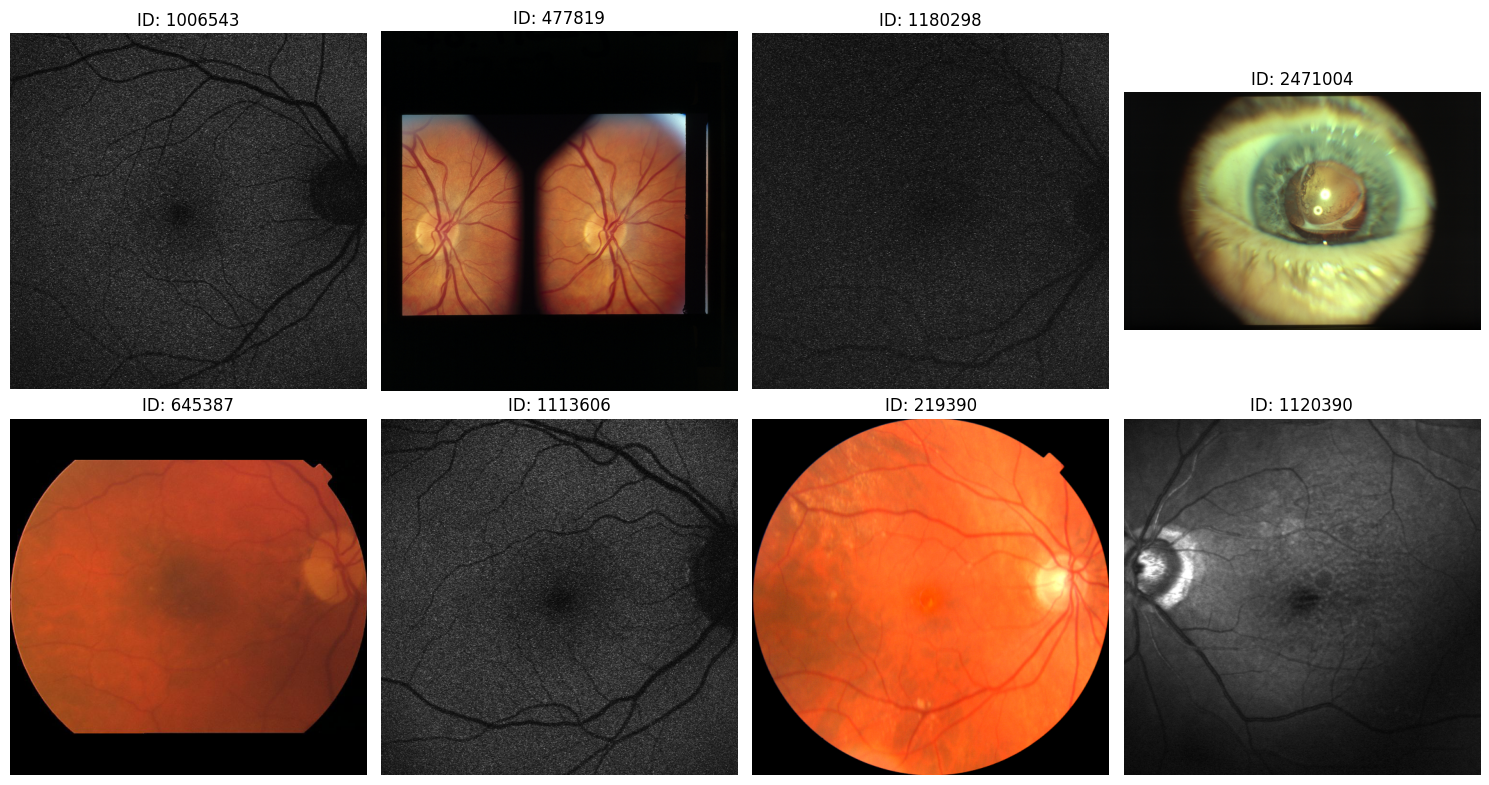

In [7]:
ims_sample = sample(images_png, 8)
plot(ims_sample)

2244274 /mnt/oogergo/ergo/TRITON_ERGO/dicom/StudyInstance_1.2.392.200106.1651.6.2.1048892848179.45621.22687/SC.1.2.392.200106.1651.6.2.1048892848179.3941700867.236.dcm
2126481 /mnt/oogergo/ergo/TRITON_ERGO/dicom/StudyInstance_1.2.392.200106.1651.6.2.1048892848179.45149.542/OPt.1.2.392.200106.1651.6.2.1048892848179.3901000737.225.dcm
2233064 /mnt/oogergo/ergo/TRITON_ERGO/dicom/StudyInstance_1.2.392.200106.1651.6.2.1048892848179.45493.22450/SC.1.2.392.200106.1651.6.2.1048892848179.3930717072.79.dcm
2207702 /mnt/oogergo/ergo/TRITON_ERGO/dicom/StudyInstance_1.2.392.200106.1651.6.2.1048892848179.45300.21899/SC.1.2.392.200106.1651.6.2.1048892848179.3913970816.123.dcm
1211358 /mnt/oogergo/ergo/TRITON_ERGO/dicom/StudyInstance_1.2.392.200106.1651.6.2.1048892848179.44871.662/OPt.1.2.392.200106.1651.6.2.1048892848179.3869212768.91.dcm
2216630 /mnt/oogergo/ergo/TRITON_ERGO/dicom/StudyInstance_1.2.392.200106.1651.6.2.1048892848179.45348.22032/OPt.1.2.392.200106.1651.6.2.1048892848179.3918104583.49.

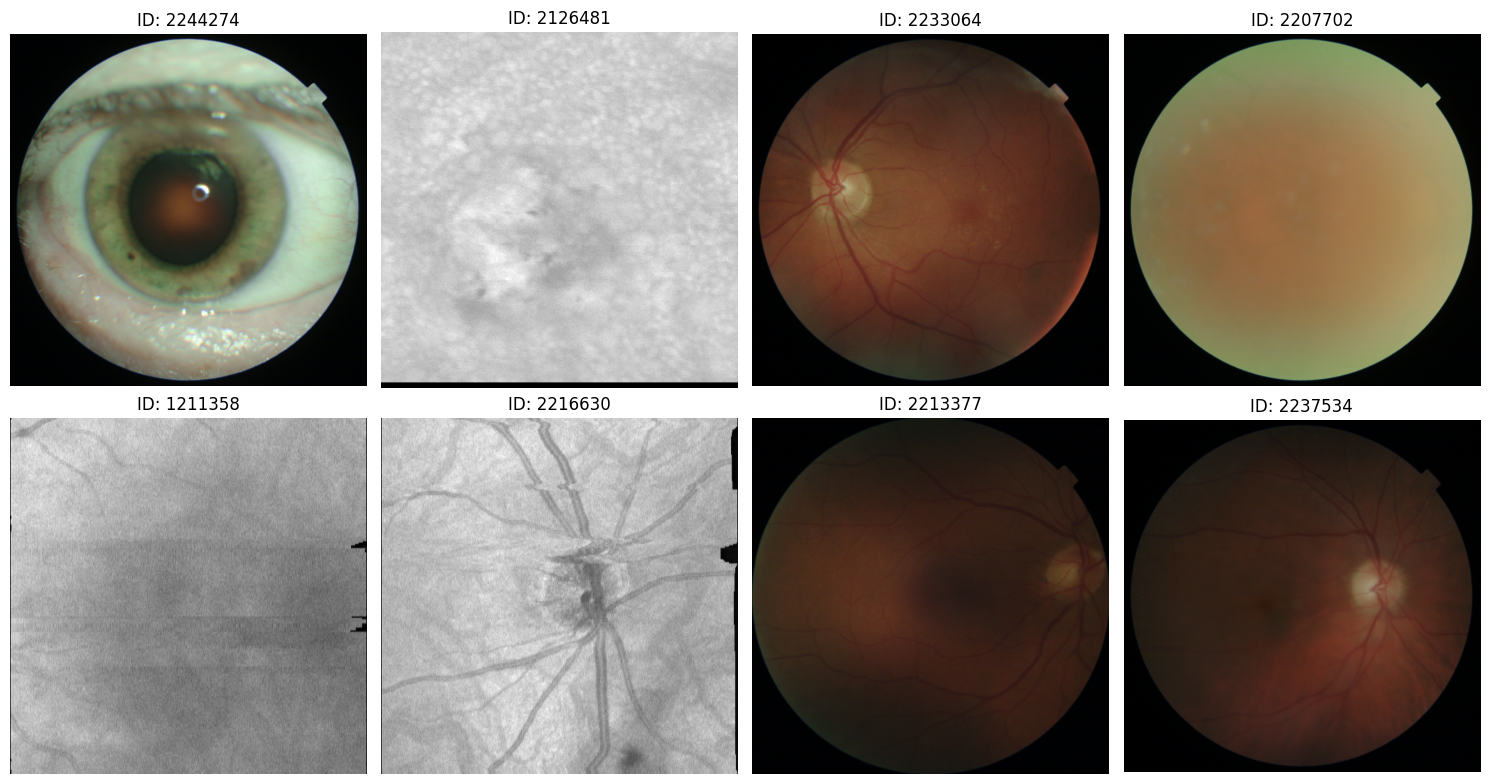

In [8]:
ims_sample = sample(images_dicom, 8)
plot(ims_sample)

289997 /mnt/oogergo/ergo/OCT_ERGO/OCT_prd/ff6f2c0c-10f6-42d3-a361-5139ac0f6f50/36266.binary


377633 /mnt/oogergo/ergo/OCT_ERGO/OCT_prd/3fcee6d2-b767-4579-99d1-7ef35b222068/67996.binary
340812 /mnt/oogergo/ergo/OCT_ERGO/OCT_prd/68a5207a-1b56-43ed-b7af-6aa62c00f38a/54961.binary
253853 /mnt/oogergo/ergo/OCT_ERGO/OCT_prd/bceab64b-dc7b-4270-9469-de163a8e312a/24216.binary
239561 /mnt/oogergo/ergo/OCT_ERGO/OCT_prd/4e338a29-554f-49c2-8d26-74fb1cfead2c/19356.binary
307700 /mnt/oogergo/ergo/OCT_ERGO/OCT_prd/b8e4bbaa-ac33-49b0-8b43-943f3839b61e/42851.binary
384848 /mnt/oogergo/ergo/OCT_ERGO/OCT_prd/1d75f500-9f8c-468d-9f06-ea476d021147/70458.binary
312099 /mnt/oogergo/ergo/OCT_ERGO/OCT_prd/a79d4510-e961-40d6-81ea-da745e7a67ef/44154.binary


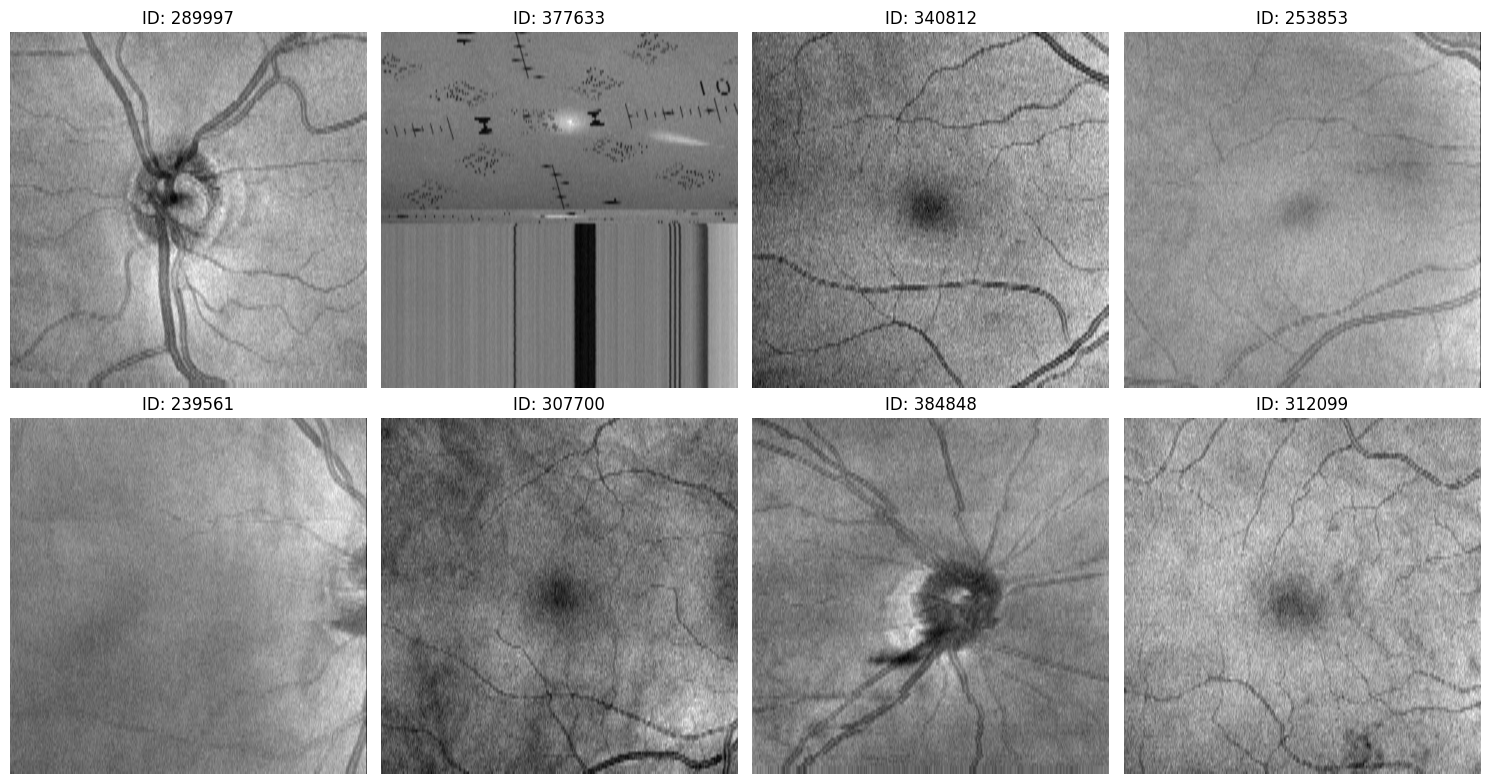

In [9]:
ims_sample = sample(images_binary, 8)
plot(ims_sample)

In [10]:
failed_ids = [
    222365,
    340377,
    340377,
    340383,
    340380,
    340379,
    638804,
    1114750
]

222365 /mnt/oogergo/ergo/OCT_ERGO/OCT_prd/43af83ce-6dca-4b41-9bc3-0ad4364d35f0/11994.binary
340377 /mnt/oogergo/ergo/OCT_ERGO/OCT_prd/7c29f126-a98a-4f88-a217-dfa753f16b78/54815.binary


340377 /mnt/oogergo/ergo/OCT_ERGO/OCT_prd/7c29f126-a98a-4f88-a217-dfa753f16b78/54815.binary
340383 /mnt/oogergo/ergo/OCT_ERGO/OCT_prd/7c29f126-a98a-4f88-a217-dfa753f16b78/54817.binary
340380 /mnt/oogergo/ergo/OCT_ERGO/OCT_prd/7c29f126-a98a-4f88-a217-dfa753f16b78/54816.binary
340379 /mnt/oogergo/ergo/OCT_ERGO/OCT_prd/7c29f126-a98a-4f88-a217-dfa753f16b78/54816.png
638804 /mnt/oogergo/ergo/CF_ERGO/DATA_IBASE/7c29f126-a98a-4f88-a217-dfa753f16b78/4568V16B4SQSREI8.png
1114750 /mnt/oogergo/ergo/HRA_ERGO/DATA/7c29f126-a98a-4f88-a217-dfa753f16b78/00007076-00058311-SLO_IR-1-0.png


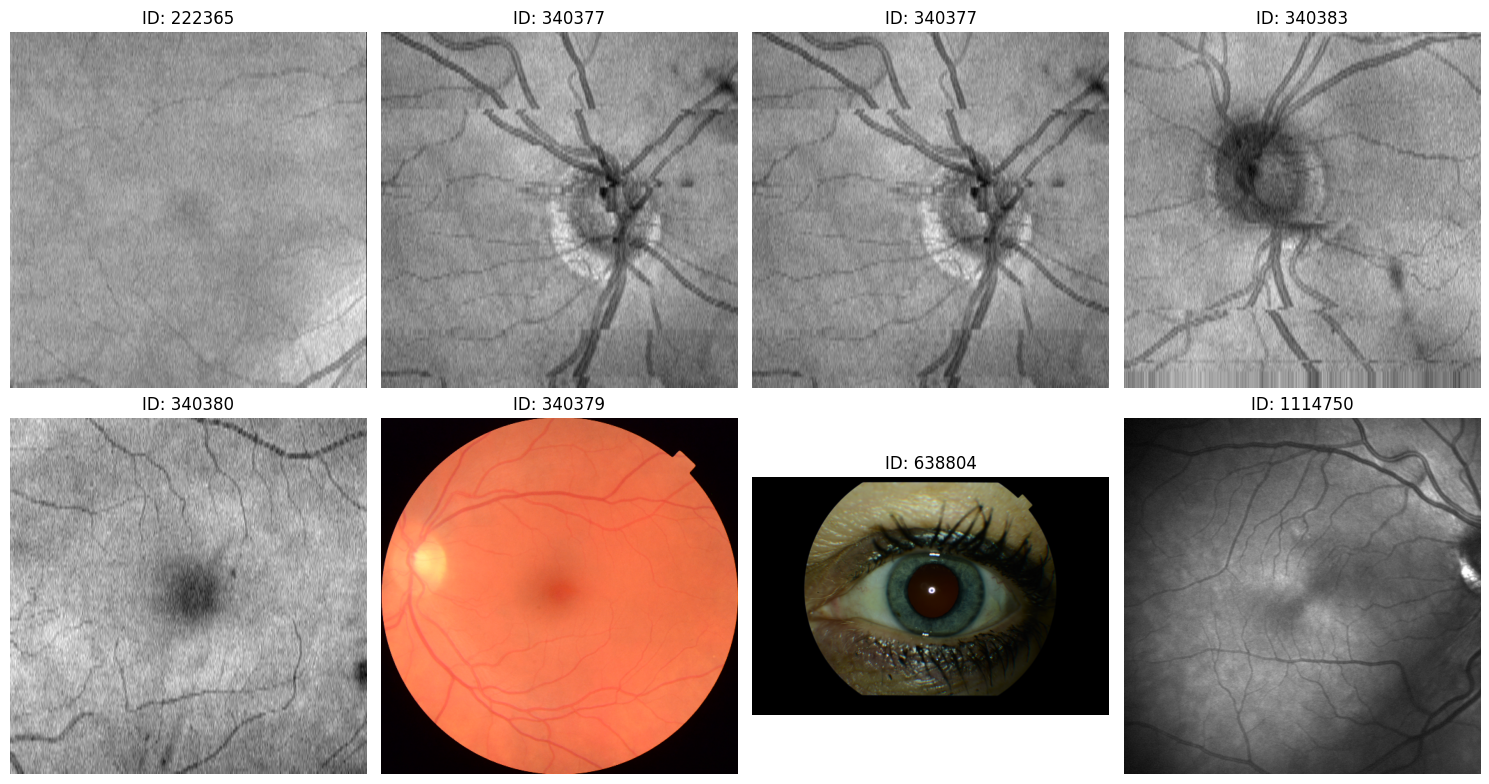

In [11]:
ims = [ImageInstance.by_id(session,id) for id in failed_ids]
plot(ims)